### 1a)

In [2]:
import scipy.stats as sts
import numpy as np
import matplotlib.pyplot as plt

In [6]:
T = 500
sigma = 0.7
unif_vec = sts.uniform.rvs(loc=0, scale=1, size=T,
random_state=25)
eps_vec = sts.norm.ppf(unif_vec, loc=0, scale=sigma)
rho = 0.85
mu=11.4

In [7]:
z = np.zeros(500)
def simu(z_t, i):
    if i < 500:
        z_t1 = rho*z_t + (1-rho)*mu + eps_vec[i]
        z[i] = z_t1
        return simu(z[i], i+1)
    else:
        return z

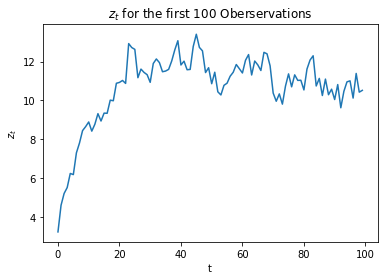

In [9]:
z = simu(unif_vec[0],0)
plt.plot(z[:100])
plt.title("$z_t$ for the first 100 Oberservations")
plt.ylabel("$z_t$")
plt.xlabel("t")
plt.show()

### 1b).

In [10]:
lower = mu - 3*sigma
upper = mu + 3*sigma
z_vals = np.array([lower,(mu-lower)/2+lower,mu,(upper-mu)/2+mu,upper])
z_vals

array([ 9.3 , 10.35, 11.4 , 12.45, 13.5 ])

### 1c).

In [11]:
z_cuts = 0.5 * z_vals[:-1] + 0.5 * z_vals[1:]
bins = np.digitize(z, z_cuts)
P = np.zeros(shape=(5,5))
for i in range(0,5):
    for j in range(0,5):
        count = 0
        denom = 0
        for k in range(0,499):
            curr = bins[k]
            nxt = bins[k+1]
            if curr == i and nxt == j:
                count += 1
            if curr == i:
                denom += 1
        P[i][j] = count/denom
print("The transition matrix is")
P

The transition matrix is


array([[0.75757576, 0.21212121, 0.03030303, 0.        , 0.        ],
       [0.1       , 0.50909091, 0.34545455, 0.04545455, 0.        ],
       [0.03144654, 0.22012579, 0.48427673, 0.2327044 , 0.03144654],
       [0.        , 0.04273504, 0.34188034, 0.5042735 , 0.11111111],
       [0.        , 0.        , 0.04255319, 0.34042553, 0.61702128]])

### 1d)

In [14]:
import numpy.linalg as LA

t = np.array([0,0,1,0,0]).reshape(5,1)
res = LA.matrix_power(P.T,3) @ t
print(r'P(z_{t+3}=5|z_t=3)=', res[4])

P(z_{t+3}=5|z_t=3)= [0.07752374]


### 1e)

In [15]:
eigvals, eigvecmat = LA.eig(P.T)
print(eigvals)

[0.11107399 1.         0.36137544 0.79405964 0.60572911]


In [17]:
eigvec = eigvecmat[:, 1] / eigvecmat[:, 1].sum()
stat_dist = eigvec
print("State dist is:", stat_dist)

State dist is: [0.13226453 0.22044088 0.31863727 0.23446894 0.09418838]


This is the eigenvector associated with $\lambda=1$

### 1f).

In [19]:
z_0 = z_vals[2]

x_vec = np.zeros(T)
x_t = z_0
xt_ind = 1
for t_ind in range(T):
    xtp1_ind = \
        np.argwhere(unif_vec[t_ind] <= np.cumsum(P[xt_ind, :])).min()
    x_tp1 = z_vals[xtp1_ind]
    x_vec[t_ind] = x_tp1
    
    x_t = x_tp1
    xt_ind = xtp1_ind

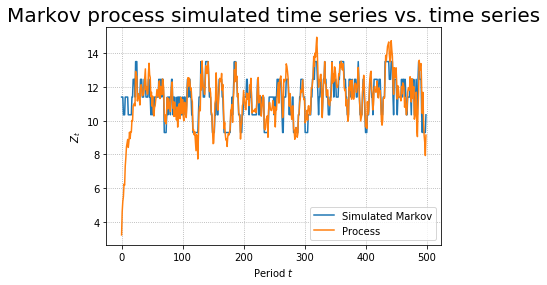

In [20]:
plt.plot(x_vec)
plt.plot(z)
plt.grid(b=True, which='major', color='0.65', linestyle=':')
plt.title(r'Markov process simulated time series vs. time series', fontsize=20)
plt.xlabel(r'Period $t$')
plt.ylabel(r'$Z_t$')
plt.legend(['Simulated Markov', 'Process'])
plt.show()
